In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def mc_parallel(c,v,t,w,koff,kon,aoff,aon,voff,von,roff,ron,woff,won,p,j,foff='prodromakis',fon='prodromakis',relationship='linear'):
    def i_cap(c,v,t):
        i=[]
        for j in range(len(v)):
            if j == 0:
                i.append(0)
            else:
                dv = v[j]-v[j-1]
                dt = t[j]-t[j-1]
                i.append(c*dv/dt)
        return i
    
    def vteam(v,t,w,koff,kon,aoff,aon,voff,von,roff,ron,woff,won,p,j,foff,fon,relationship):
        'Memristor model based on the VTEAM model, input paramaters are'

        def prodromakis(x,p,j):
            dum=(x-0.5)**2
            dum1=(dum+0.75)**p
            return(j*(1-dum1))
        def why(x,d):
            return((x*(d-x))/(d**2))
        def johleker(x,p):
            return(1-(((2*x)-1)**(2*p)))

        def dw(v,koff,kon,aoff,aon,voff,von,woff,won,w,p,j,dt):
            
            x = w / (woff-won) 
            if 0<voff<v:
                dum = koff*(((v/voff)-1)**aoff)
                if foff == 'prodromakis':
                    func = prodromakis(x,p,j)
                if foff =='test':
                    func = why(w,woff)
                if foff == 'johleker':
                    func = johleker(x,p)
                return(dum*func*dt)
                   

            if von<v<voff:
                return(0)

            if v<von<0:
                dum = kon*(((v/von)-1)**aon)
                if fon == 'prodromakis':
                    func = prodromakis(x,p,j)
                if fon == 'test':
                    func = why(w,woff)
                if fon == 'johleker':
                    func = johleker(x,p)  
                    
                return(dum*func*dt)

            else: 
                return(0)

        def  linear(roff,ron,woff,won,v,w):
            dum = (roff-ron)/(woff-won)
            dum1 = ((dum * (w-won))+ron)**(-1)

            return((dum1*v),dum1)


        out=[]
        boundarypos=[] 
        if relationship == 'linear':
            rel = linear
        for k in range(len(t)):
            if k!=0:
                dt= (t[k]-t[k-1])
                change=dw(v[k],koff,kon,aoff,aon,voff,von,woff,won,w,p,j,dt)
                w=w+change
                out.append(rel(roff,ron,woff,won,v[k],w)[0])
                boundarypos.append(w)
            else:
                out.append(rel(roff,ron,woff,won,v[k],w)[0])
                boundarypos.append(w)
        return(out,boundarypos)
    
    
    
    icap = i_cap(c,v,t)
    imem = vteam(v,t,w,koff,kon,aoff,aon,voff,von,roff,ron,woff,won,p,j,foff,fon,relationship)[0]
    membounary = vteam(v,t,w,koff,kon,aoff,aon,voff,von,roff,ron,woff,won,p,j,foff,fon,relationship)[1]

    out = []
    for i in range(len(imem)):
        out.append(icap[i]+imem[i])
    return([out,icap,imem,membounary])

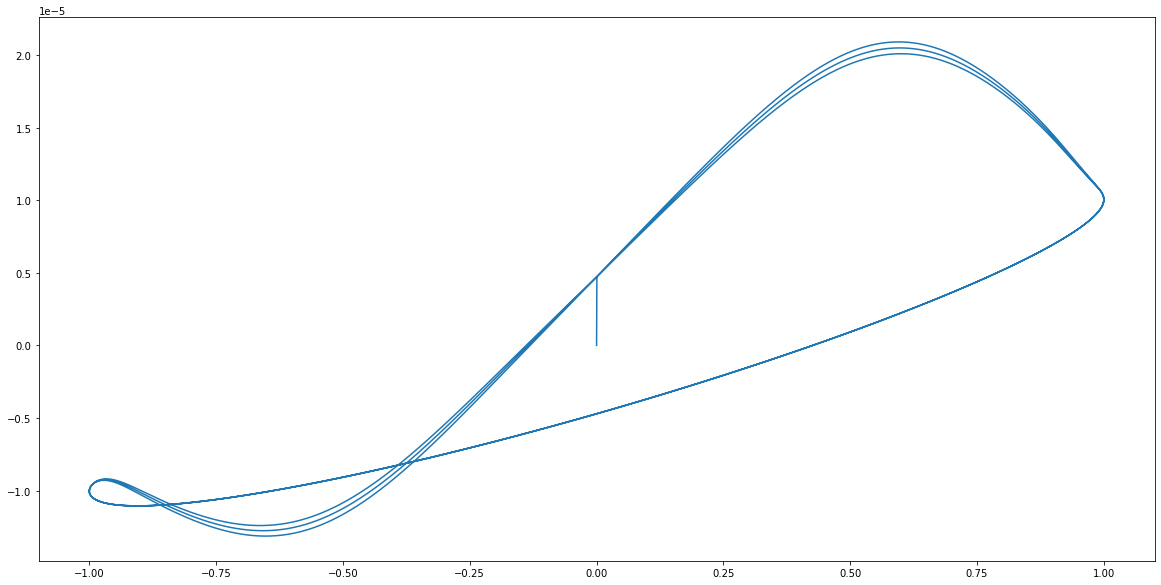

In [3]:
c =0.75e-6
t = np.arange(0,3,0.0001)
v0 = 1
f = 1
v = v0*np.sin(math.pi*2*f*t)
w = 5.2e-9
won = 0
woff = 27e-9
koff = 3.3e-9
kon = -3.3e-9
aoff = 2
aon = 2
voff = 0.1
von = -0.1
roff = 100e3
ron = 10e3
p = 2
j = 4

current = mc_parallel(c,v,t,w,koff,kon,aoff,aon,voff,von,roff,ron,woff,won,p,j,foff='johleker',fon='johleker')
plt.figure(figsize=(20,10))
plt.plot(v,current[0])
plt.show()

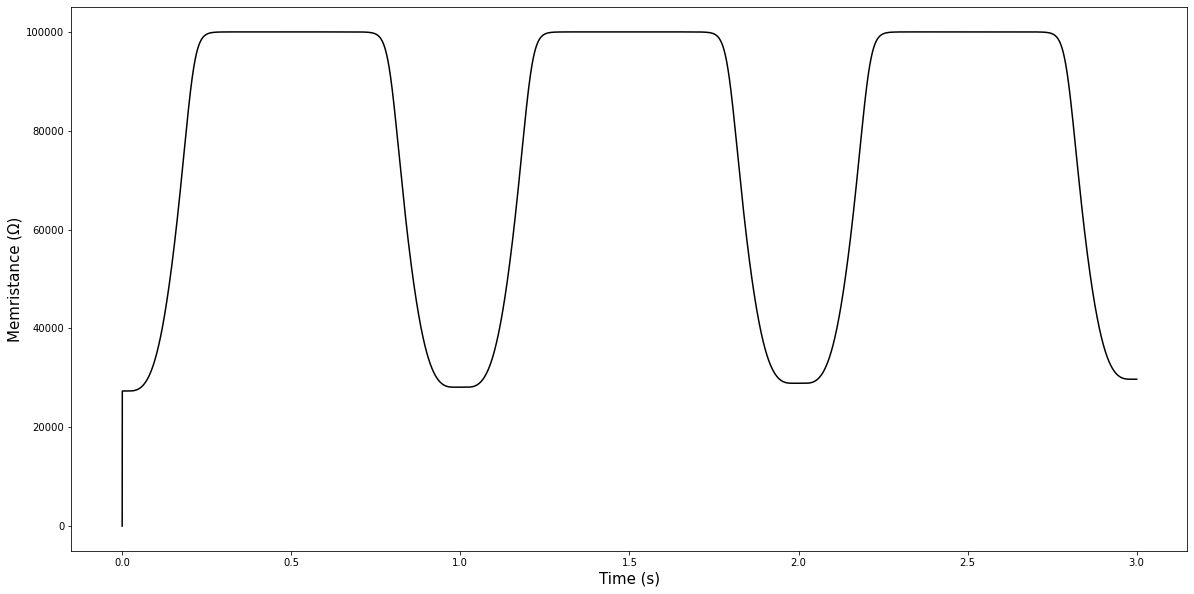

0


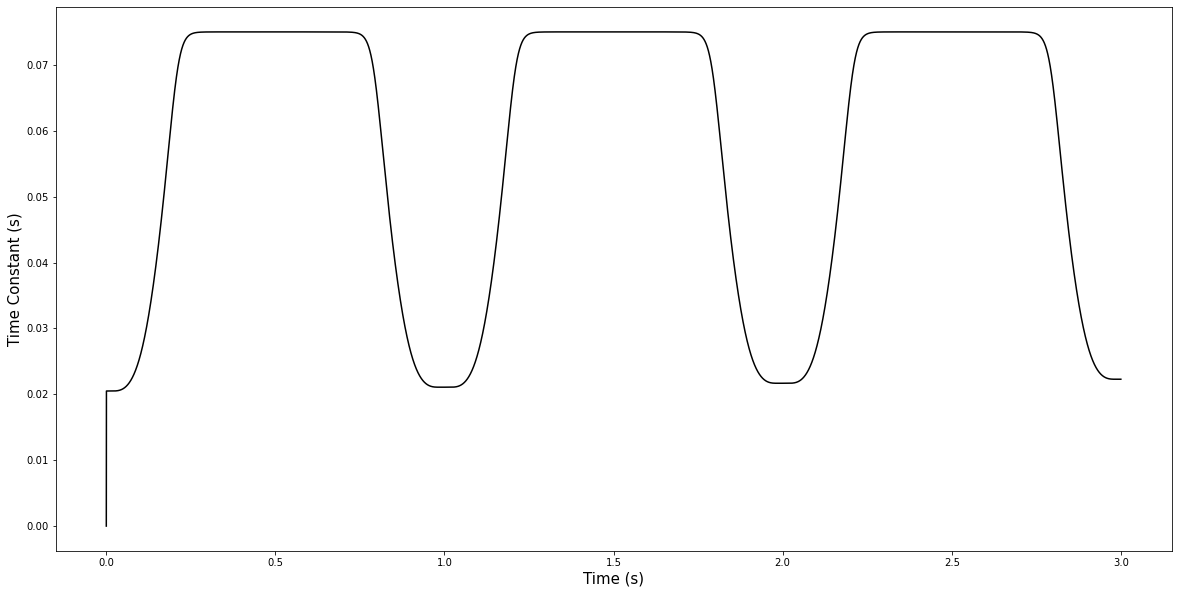

In [4]:
rmem=[]
for i in range(len(v)):
    if current[2][i]!=0:
        rmem.append(v[i]/current[2][i])
    else:
        rmem.append(0)
plt.figure(figsize=(20,10))
plt.plot(t,rmem,color='black')
plt.xlabel('Time (s)',fontsize=15)
plt.ylabel('Memristance (\u03A9)',fontsize=15)
plt.show()
print(rmem[0])

tconst = []
for i in range(len(rmem)):
    tconst.append(float(rmem[i]*c))
    
plt.figure(figsize=(20,10))
plt.plot(t,tconst,color='black')
plt.xlabel('Time (s)',fontsize=15)
plt.ylabel('Time Constant (s)',fontsize=15)
plt.show()

In [5]:
from scipy.fft import fft, fftfreq

In [6]:
yfft=fft(tconst)
xfft=fftfreq(len(tconst),(t[1]-t[0]))

(-1.0, 10.0)

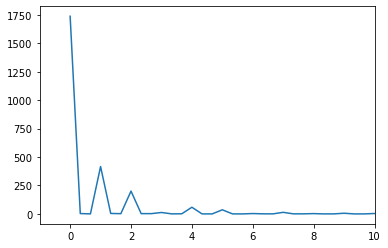

In [7]:
plt.plot(xfft[:len(tconst)//2],np.abs(yfft[:len(tconst)//2]))
plt.xlim(-1,10)

(-1.0, 10.0)

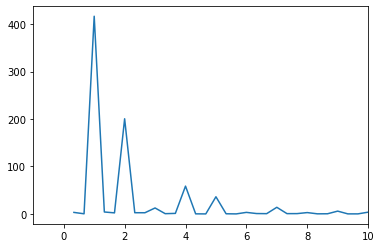

In [8]:
xplot=[]
yplot=[]
for i in range(len(xfft)):
    if xfft[i] >= 0.01:
        xplot.append(xfft[i])
        yplot.append(yfft[i])
plt.plot(xplot[:len(tconst)//2],np.abs(yplot[:len(tconst)//2]))
plt.xlim(-1,10)

In [9]:
values=[]
dum=max(np.abs(yplot[:len(tconst)//2]))
for i in range(len(yplot[:len(tconst)//2])):
    dum1=np.abs(yplot[:len(tconst)//2])[i]
    if dum1 == dum:
        values=xplot[i]
        break

In [10]:
values

1.0

In [11]:
c =0.75e-6
t = np.arange(0,3,0.0001)
v0 = 1
f = np.arange(0,20,0.01)
#v = v0*np.sin(math.pi*2*f*t)
w = 5.2e-9
won = 0
woff = 27e-9
koff = 3.3e-9
kon = -3.3e-9
aoff = 2
aon = 2
voff = 0.1
von = -0.1
roff = 100e3
ron = 10e3
p = 2
j = 4

values=[]
for i in range(len(f)):
    v = v0*np.sin(math.pi*2*f[i]*t)#finds the new input voltage at a new frequency
    current = mc_parallel(c,v,t,w,koff,kon,aoff,aon,voff,von,roff,ron,woff,won,p,j,foff='johleker',fon='johleker')#finds the memristor capacitor currents
    rmem=[] #array for memristor resistance over time 
    for j in range(len(v)): #loops over the voltage array
        if current[2][j]!=0: #checks to see if the memristor current is 0, as if it is there will be a divide by 0 error
            rmem.append(v[i]/current[2][i]) #uses v=ir to find the memristor reistor 
        else:
            rmem.append(0) #if the current is 0 then set the resitance to 0 for ease
    tconst = [] #an array for the time constant 
    for j in range(len(rmem)):
        tconst.append(float(rmem[i]*c)) #finds the time constant at the time step and adds it to the array 
    yfft = fft(tconst) #finds the fourier transform for the time constant 
    xfft = fftfreq(len(tconst),t[1]-t[0]) #finds the frequency domain for the yfft data
    #the above fft data has 0th order data in there, and so we need to remove this as its not useful for finding the peak 
    xfftnew = []#an array for later 
    yfftnew = []#an array for later
    for j in range(len(xfft)):
        if xfft[j] >= 0.01:
            xfftnew.append(xfft[j])#adds all values where the xfft is grater than 0.01 to a new array, in hopes to remove 0th order
            yfftnew.append(yfft[j])#same as above but for y data 
    dum = max(np.abs(yfftnew[:len(tconst)//2])) #finds the new maximum peak in the yfft data
    for j in range(len(yfftnew[:len(tconst)//2])): #for loop over 
        dum1 = np.abs(yfftnew[:len(tconst)//2])[j] #sets the current yfft value to be dum1 for easy of read on the next line
        if dum1 == dum: #if the current yfft is the peak frequency
            values.append(xfftnew[i]) #add the value to the output array 
            break #breaks the loop and start on the next frequency as the peak for this frequency has already been found

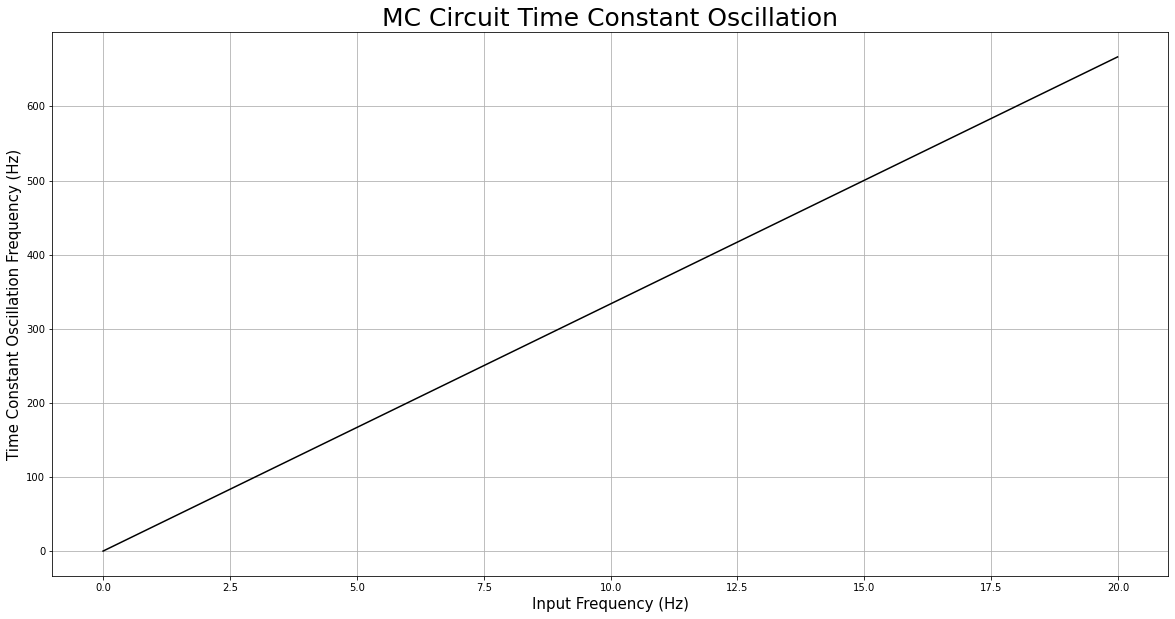

In [12]:
plt.figure(figsize=(20,10))
plt.title('MC Circuit Time Constant Oscillation',fontsize=25)
plt.plot(f,values,color='black')
#plt.scatter(f,values,color='black')
plt.xlabel('Input Frequency (Hz)',fontsize=15)
plt.ylabel('Time Constant Oscillation Frequency (Hz)',fontsize=15)
plt.grid()
plt.show()

In [13]:
c =0.75e-6
t = np.arange(0,50,0.001)
v0 = 1
f = np.arange(0,20,0.1)
#v = v0*np.sin(math.pi*2*f*t)
w = 5.2e-9
won = 0
woff = 27e-9
koff = 3.3e-9
kon = -3.3e-9
aoff = 2
aon = 2
voff = 0.1
von = -0.1
roff = 100e3
ron = 10e3
p = 2
j = 4

values=[]
for i in range(len(f)):
    v = v0*np.sin(math.pi*2*f[i]*t)#finds the new input voltage at a new frequency
    current = mc_parallel(c,v,t,w,koff,kon,aoff,aon,voff,von,roff,ron,woff,won,p,j,foff='johleker',fon='johleker')#finds the memristor capacitor currents
    rmem=[] #array for memristor resistance over time 
    for j in range(len(v)): #loops over the voltage array
        if current[2][j]!=0: #checks to see if the memristor current is 0, as if it is there will be a divide by 0 error
            rmem.append(v[i]/current[2][i]) #uses v=ir to find the memristor reistor 
        else:
            rmem.append(0) #if the current is 0 then set the resitance to 0 for ease
    tconst = [] #an array for the time constant 
    for j in range(len(rmem)):
        tconst.append(float(rmem[i]*c)) #finds the time constant at the time step and adds it to the array 
    yfft = fft(tconst) #finds the fourier transform for the time constant 
    xfft = fftfreq(len(tconst),t[1]-t[0]) #finds the frequency domain for the yfft data
    #the above fft data has 0th order data in there, and so we need to remove this as its not useful for finding the peak 
    xfftnew = []#an array for later 
    yfftnew = []#an array for later
    for j in range(len(xfft)):
        if xfft[j] >= 0.01:
            xfftnew.append(xfft[j])#adds all values where the xfft is grater than 0.01 to a new array, in hopes to remove 0th order
            yfftnew.append(yfft[j])#same as above but for y data 
    dum = max(np.abs(yfftnew[:len(tconst)//2])) #finds the new maximum peak in the yfft data
    for j in range(len(yfftnew[:len(tconst)//2])): #for loop over 
        dum1 = np.abs(yfftnew[:len(tconst)//2])[j] #sets the current yfft value to be dum1 for easy of read on the next line
        if dum1 == dum: #if the current yfft is the peak frequency
            values.append(xfftnew[i]) #add the value to the output array 
            break #breaks the loop and start on the next frequency as the peak for this frequency has already been found

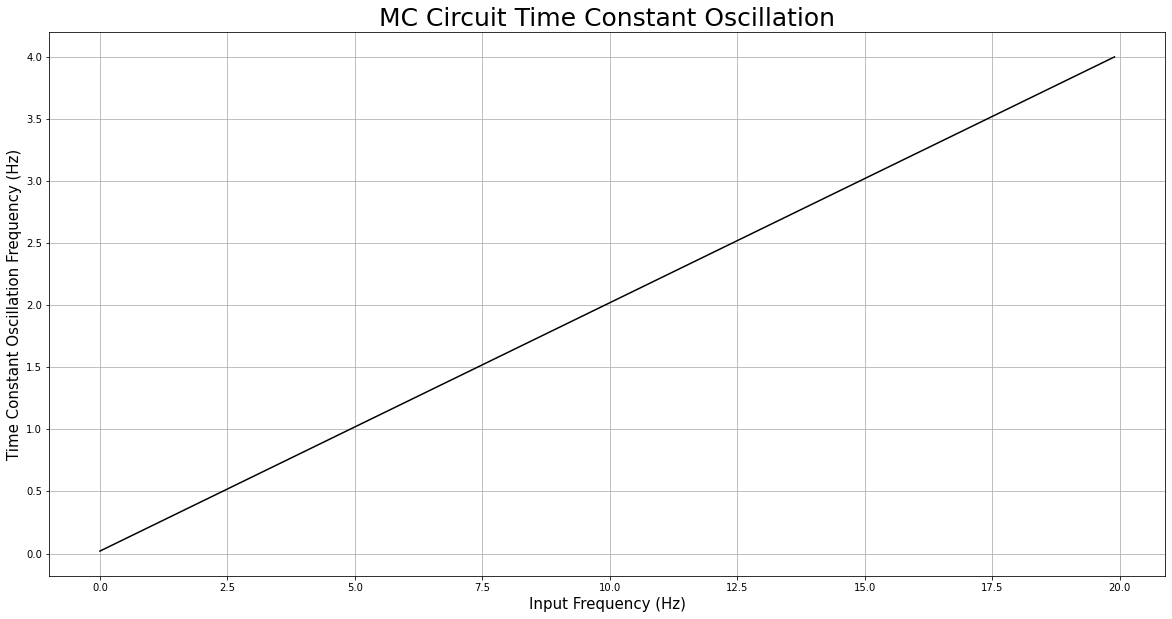

In [14]:
plt.figure(figsize=(20,10))
plt.title('MC Circuit Time Constant Oscillation',fontsize=25)
plt.plot(f,values,color='black')
#plt.scatter(f,values,color='black')
plt.xlabel('Input Frequency (Hz)',fontsize=15)
plt.ylabel('Time Constant Oscillation Frequency (Hz)',fontsize=15)
plt.grid()
plt.show()

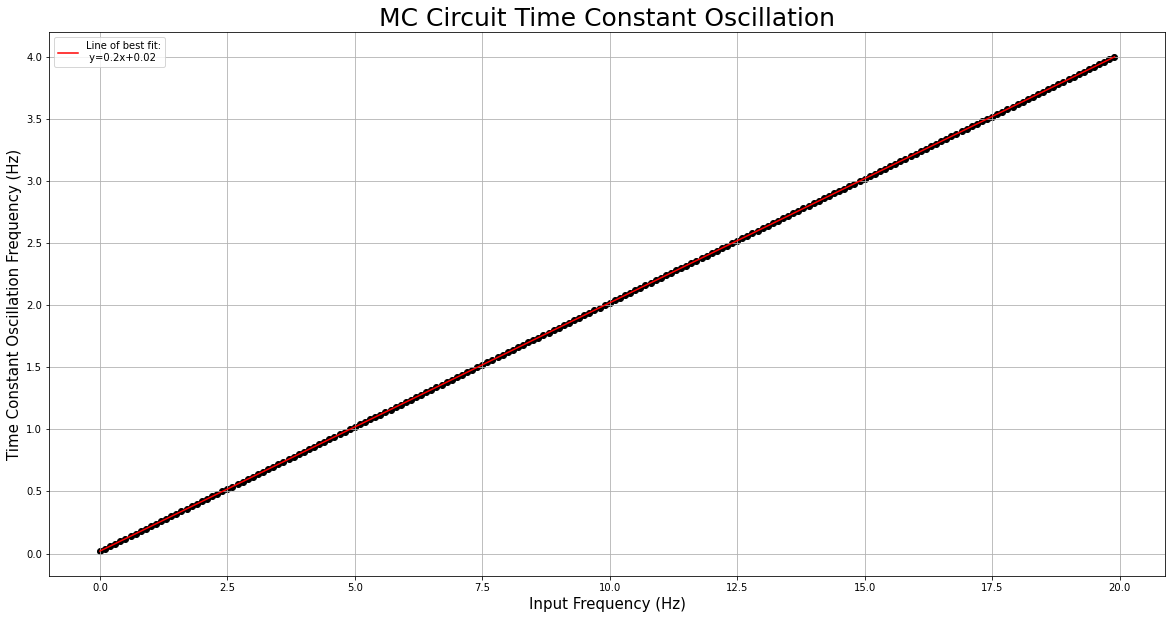

In [15]:
from scipy.optimize import curve_fit
def linear(x,m,c):
    return((m*x)+c)
p,pp = curve_fit(linear,f,values)

x = np.linspace(min(f),max(f),len(f))

plt.figure(figsize=(20,10))
plt.title('MC Circuit Time Constant Oscillation',fontsize=25)
#plt.plot(f,values,color='black')
plt.scatter(f,values,color='black')
plt.plot(x,linear(x,p[0],p[1]),color='red',label='Line of best fit:\n y='+str(round(p[0],4))+'x+'+str(round(p[1],4)))

plt.xlabel('Input Frequency (Hz)',fontsize=15)
plt.ylabel('Time Constant Oscillation Frequency (Hz)',fontsize=15)
plt.grid()
plt.legend()
plt.show()